In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("ds_salaries.csv")

In [4]:
df.head()

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [8]:
df['work_year'].unique()

array([2020, 2021, 2022], dtype=int64)

### Taking a look at the data by work_year

<Axes: xlabel='work_year'>

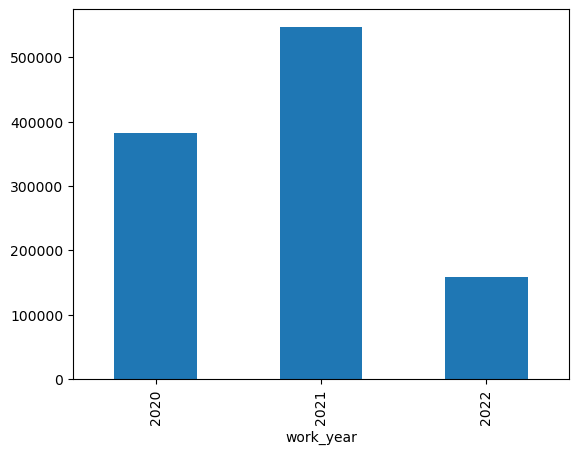

In [27]:
df.groupby('work_year')['salary'].mean().plot(kind='bar')

### By Experience Level

In [29]:
# df.groupby('experience_level')['salary'].mean().plot(kind='bar')
df.groupby('experience_level')['salary'].mean()

experience_level
EN    264622.454545
EX    427072.115385
MI    480617.690141
SE    213949.353571
Name: salary, dtype: float64

### Trying to segregate based on job description

In [28]:
df['job_title'].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

In [49]:
# Getting the salary by 10000
salary_per_job = pd.DataFrame(df.groupby('job_title')['salary_in_usd'].mean())
salary_per_job['salary_in_usd'] = salary_per_job['salary_in_usd'].apply(lambda x:round(x, 2))
salary_per_job

,salary_in_usd
job_title,
3D Computer Vision Researcher,5409.00
AI Scientist,66135.57
Analytics Engineer,175000.00
Applied Data Scientist,175655.00
Applied Machine Learning Scientist,142068.75
BI Data Analyst,74755.17
Big Data Architect,99703.00
Big Data Engineer,51974.00
Business Data Analyst,76691.20


In [46]:
df['job_title'].value_counts()

job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                  

In [47]:
df[df['job_title'] == 'Data Analytics Lead']

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
523,523,2022,SE,FT,Data Analytics Lead,405000,USD,405000,US,100,US,L


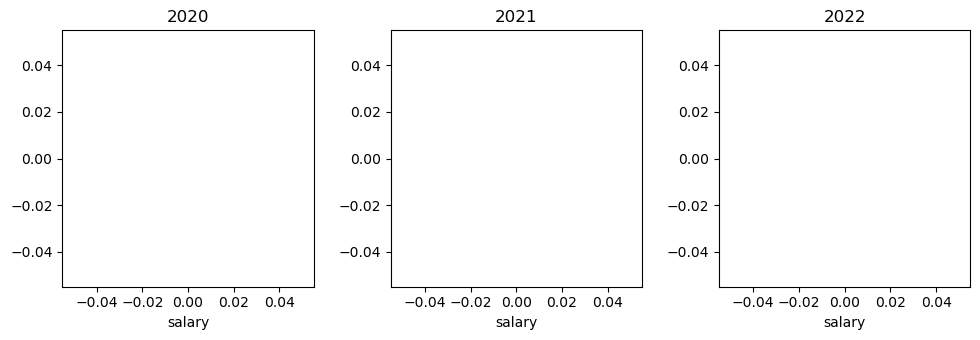

In [15]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(10, 3.5))
for i in range(3):
    work_year = 2020+i
    year_data = df[df['work_year']==work_year]
    sns.scatterplot(ax=axs[i], data=year_data, x="salary")
    axs[i].set_title(str(2020+i))

fig.tight_layout()
plt.show()